In [4]:
%pip install pybaseball

You should consider upgrading via the 'C:\Users\alans\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pybaseball as pyb

# get data for all qualified batters in 2021
data = pyb.statcast(start_dt = '2021-04-01', end_dt = '2022-04-16')

This is a large query, it may take a moment to complete


C:\Users\alans\anaconda3\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [02:08<00:00,  2.04it/s]


In [3]:
for col in data:
    print(col)

pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axi

In [16]:
bip = data[data.description == 'hit_into_play']
bip = bip.replace('single', 1)
bip = bip.replace('double', 2)
bip = bip.replace('triple', 3)
bip = bip.replace('home_run', 4)
bip = bip.replace('field_out', -1)
bip = bip.replace('force_out', -1)
bip = bip.replace('fielders_choice_out', -1)
bip = bip.replace('sac_bunt', -1)
bip = bip.replace('grounded_into_double_play', -2)
bip = bip.replace('double_play', -2)
bip = bip.replace('sac_fly', -1)
bip = bip.replace('field_error', 0)
bip = bip.replace('catcher_interf', 0)
bip = bip.replace('fielders_choice', -1)
bip = bip.replace('sac_fly_double_play', -2)
bip = bip.replace('sac_bunt_double_play', -2)
bip = bip.replace('triple_play', -3)
bip = bip.dropna(subset = ['if_fielding_alignment'])
bip

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3180,SI,2022-04-16,98.2,-0.82,6.6,"Holmes, Clay",656775,605280,-1,hit_into_play,...,5,5,2,2,5,Strategic,Standard,221,-0.005,-0.083
3379,SI,2022-04-16,98.1,-0.77,6.64,"Holmes, Clay",621532,605280,-1,hit_into_play,...,5,5,2,2,5,Standard,Standard,223,-0.012,-0.134
1598,SL,2022-04-16,82.8,2.97,6.59,"Wells, Alexander",608336,649144,-1,hit_into_play,...,2,5,2,5,2,Infield shift,Standard,187,0.004,-0.303
1782,FF,2022-04-16,88.2,3.01,6.45,"Wells, Alexander",518626,649144,2,hit_into_play,...,2,5,2,5,2,Infield shift,Standard,153,-0.006,0.397
1879,FF,2022-04-16,86.5,2.86,6.65,"Wells, Alexander",519317,649144,-1,hit_into_play,...,2,5,2,5,2,Standard,Standard,156,0.003,-0.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,FF,2021-04-01,91.2,1.47,6.24,"Kershaw, Clayton",606132,477132,-1,hit_into_play,...,0,0,0,0,0,Standard,Strategic,178,-0.021,-0.349
1729,FF,2021-04-01,97.1,-1.83,6.26,"Márquez, Germán",571970,608566,-1,hit_into_play,...,0,0,0,0,0,Standard,Standard,201,0.042,-0.39
2690,SI,2021-04-01,95.8,-1.7,6.25,"Márquez, Germán",457759,608566,-2,hit_into_play,...,0,0,0,0,0,Standard,Standard,209,0.103,-0.566
3166,FF,2021-04-01,96.2,-2.14,6.08,"Márquez, Germán",608369,608566,1,hit_into_play,...,0,0,0,0,0,Infield shift,Standard,216,-0.052,0.7


TypeError: float() argument must be a string or a number, not 'NAType'

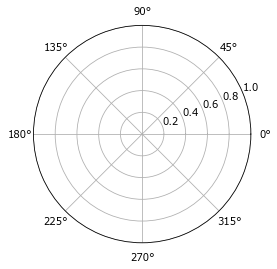

In [171]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['green', 'blue', 'red']
thetas = []
radii = []

for i in range(len(bip) - 1):
    row = bip[i:i+1]
    r = 2 * row['hit_distance_sc']
    theta = 2 * np.pi * row['launch_angle']
    radii.append(r)
    thetas.append(theta)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(thetas, radii, s=1000, alpha=0.75)

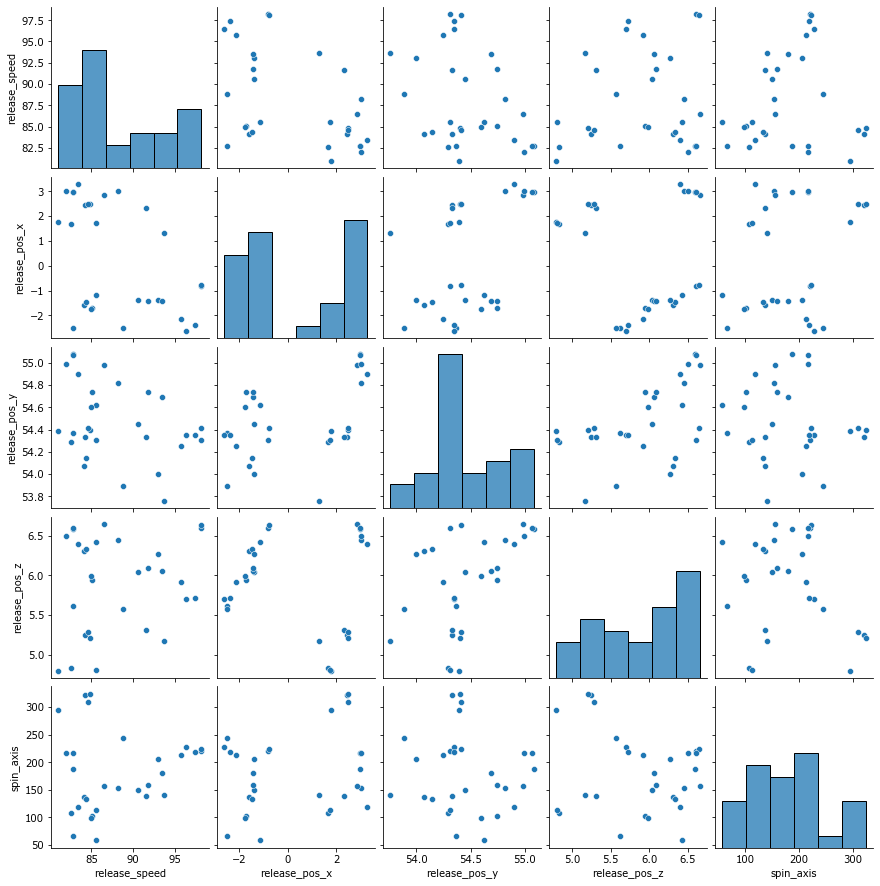

In [23]:
import seaborn as sns

sns.pairplot(bip[['release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'spin_axis']][:30])

In [21]:
import pandas as pd

hits = [bip[bip.events == 'single'], bip[bip.events == 'double'], bip[bip.events == 'triple'], bip[bip.events == 'home_run']]
hits = pd.concat(hits)
hits

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1228,FF,2022-04-16,95.7,-2.14,5.92,"King, Michael",641820,650633,single,hit_into_play,...,5,5,2,2,5,Standard,Standard,213,0.054,0.612
1444,CU,2022-04-16,82.8,-2.51,5.62,"King, Michael",663624,650633,single,hit_into_play,...,5,5,2,2,5,Standard,Standard,66,0.03,0.264
2743,SL,2022-04-16,82.0,3.01,6.5,"Wells, Alexander",543305,649144,single,hit_into_play,...,2,5,2,5,2,Standard,Standard,217,-0.009,0.625
3789,CH,2022-04-16,83.4,3.29,6.4,"Wells, Alexander",643396,649144,single,hit_into_play,...,2,5,2,5,2,Standard,Standard,118,-0.009,0.422
2544,SI,2022-04-16,93.7,1.3,5.17,"Sears, JP",641820,676664,single,hit_into_play,...,5,5,2,2,5,Standard,Strategic,141,0.068,0.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,SI,2021-04-01,89.6,4.18,3.37,"Hill, Tim",641796,657612,home_run,hit_into_play,...,6,6,6,6,6,Standard,Standard,98,-0.241,1.889
18,FF,2021-04-01,96.6,-1.89,5.78,"Darvish, Yu",452678,506433,home_run,hit_into_play,...,6,4,6,4,6,Infield shift,Standard,206,-0.115,1.918
177,FC,2021-04-01,86.3,-1.71,5.92,"Darvish, Yu",606466,506433,home_run,hit_into_play,...,6,2,6,2,6,Standard,Standard,131,-0.033,1.006
659,FC,2021-04-01,84.6,3.37,5.62,"Bumgarner, Madison",571976,518516,home_run,hit_into_play,...,1,1,4,4,1,Infield shift,Standard,200,0.08,0.951
